# Weekly project
This weeks weekly project is a continuation of last weeks exercises.

You are to make a handwritten number classifier. Where we will be using the [mnist dataset](https://en.wikipedia.org/wiki/MNIST_database).

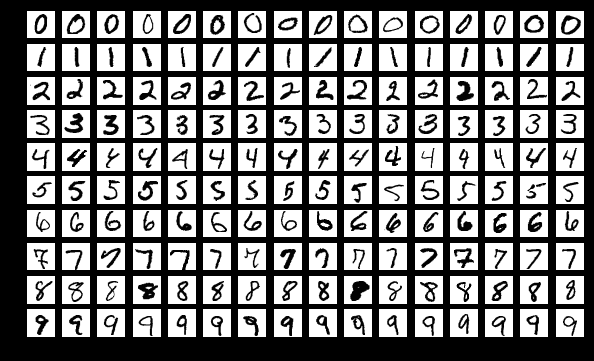

**Create a program that given an image from the mnist dataset.**
- You are free to use any algorithm you want to achieve this.
- It should be able to given a number classify what number it is.
- Accuracy should at least be 80%

If you decide to use a svm make sure you also use dimensionality reduction. SVM of the full mnist dataset will take around 4-8 hours depending on your pc.



**Challange:**
- Try to reach 98% accuracy.
- Try to classify faces with the labeled wild faces dataset [lwf](http://vis-www.cs.umass.edu/lfw/)
```{Python}
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
```

In [1]:
import math
import ssl

import numpy as np
from sklearn.datasets import fetch_openml

ssl._create_default_https_context = ssl._create_unverified_context
mnist = fetch_openml('mnist_784', version=1)

images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()

print(images.shape)
print(targets.shape)

(70000, 784)
(70000,)


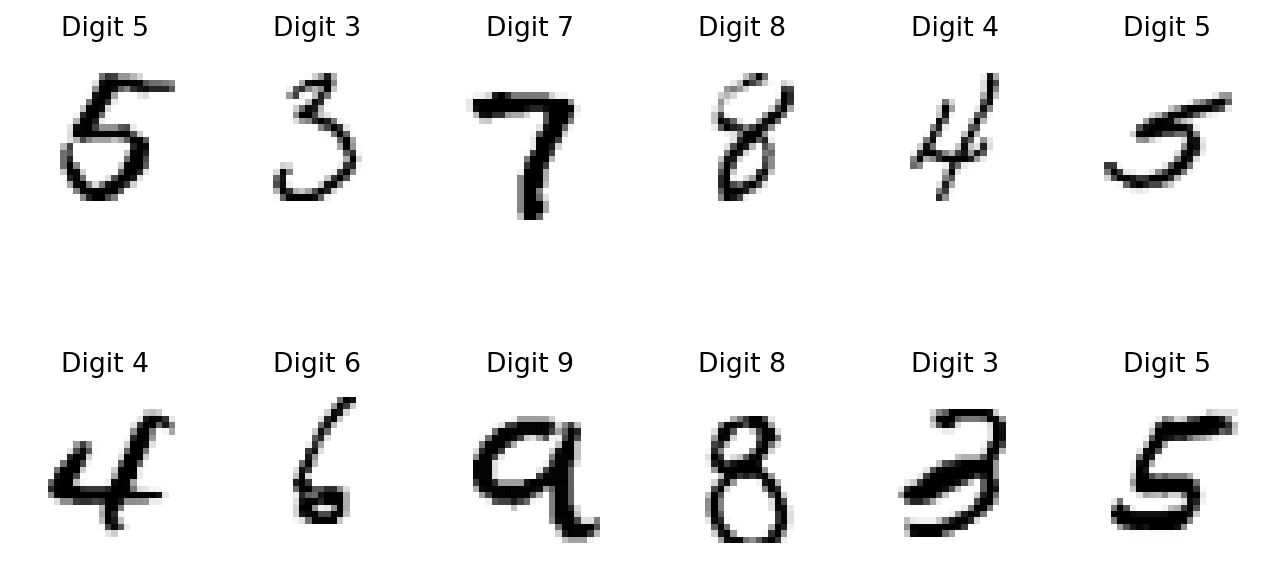

In [3]:



def show_some_digits(images, targets, sample_size=24, title_text='Digit {}'):
    '''
    Visualize random digits in a grid plot
    images - array of flatten gidigs [:,784]
    targets - final labels
    '''
    nsamples = sample_size
    rand_idx = np.random.choice(images.shape[0], nsamples)
    images_and_labels = list(zip(images[rand_idx], targets[rand_idx]))

    img = plt.figure(1, figsize=(10, 5), dpi=160)
    for index, (image, label) in enumerate(images_and_labels):
        plt.subplot(math.ceil(nsamples / 6.0), 6, index + 1)
        plt.axis('off')
        #each image is flat, we have to reshape to 2D array 28x28-784
        plt.imshow(image.reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(title_text.format(label))
    plt.show()


# draw 12 images along with their labels
show_some_digits(images, targets, 12)

In [12]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import sklearn.svm as svm

X = images
y = targets.astype(np.uint8)
pca = PCA()
X_pca = pca.fit_transform(X)

n = 35
print(sum(pca.explained_variance_ratio_[:n]))

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.9)
print(y_train.shape[0], y_test.shape[0])

0.7621802959677102
7000 63000


In [13]:
gamma = 0.5
C = 0.5
model = svm.SVC(kernel='rbf', gamma=gamma, C=C, verbose=True, shrinking=False)
model.fit(X_train, y_train)

[LibSVM]...*
optimization finished, #iter = 3044
obj = -518.718705, rho = 0.583024
nSV = 1480, nBSV = 673
..*
optimization finished, #iter = 2296
obj = -509.133905, rho = 0.526056
nSV = 1383, nBSV = 673
..*
optimization finished, #iter = 2190
obj = -509.246054, rho = 0.526723
nSV = 1384, nBSV = 673
.*
optimization finished, #iter = 1486
obj = -506.102829, rho = 0.508041
nSV = 1357, nBSV = 673
.*
optimization finished, #iter = 1928
obj = -474.964651, rho = -0.534918
nSV = 1299, nBSV = 626
..*
optimization finished, #iter = 2047
obj = -487.739519, rho = -0.520059
nSV = 1319, nBSV = 646
..*
optimization finished, #iter = 2246
obj = -507.879099, rho = 0.518598
nSV = 1372, nBSV = 673
.*
optimization finished, #iter = 1970
obj = -507.994759, rho = 0.519286
nSV = 1373, nBSV = 673
..*
optimization finished, #iter = 2298
obj = -512.778015, rho = 0.547715
nSV = 1417, nBSV = 673
..*
optimization finished, #iter = 2350
obj = -543.167500, rho = -0.560099
nSV = 1517, nBSV = 710
..*
optimization fini

SVC(C=0.5, gamma=0.5, shrinking=False, verbose=True)

In [14]:
print("Train error:", 1 - model.score(X_train, y_train), ". Test error:", 1 - model.score(X_test, y_test))

Train error: 0.8847142857142857 . Test error: 0.8877777777777778



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/home/seb-sti1/sebspace/pfas/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1730405949.127981   92026 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8486 - loss: 0.4938 - val_accuracy: 0.9771 - val_loss: 0.0723
Epoch 2/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9803 - loss: 0.0639 - val_accuracy: 0.9849 - val_loss: 0.0494
Epoch 3/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9877 - loss: 0.0400 - val_accuracy: 0.9859 - val_loss: 0.0456
Epoch 4/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9909 - loss: 0.0291 - val_accuracy: 0.9882 - val_loss: 0.0375
Epoch 5/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9913 - loss: 0.0261 - val_accuracy: 0.9869 - val_loss: 0.0402
Epoch 6/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9940 - loss: 0.0178 - val_accuracy: 0.9864 - val_loss: 0.0470
Epoch 7/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9938 - loss: 0.0179 - val_accuracy: 0.9884 - val_loss: 0.0384
Epoch 8/10
700/700 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9957 - loss: 0.0133 - val_accuracy: 

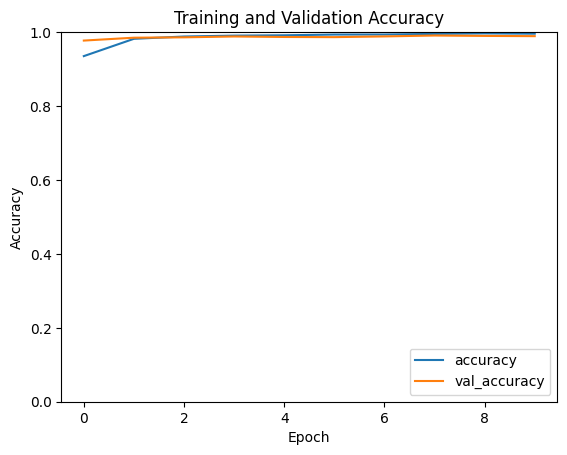

In [16]:
%pip install tensorflow
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

# Reshape to (num_samples, height, width, channels)
X_img = images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y = targets.astype(np.uint8)

X_train, X_test, y_train, y_test = train_test_split(X_img, y, test_size=0.2, random_state=42)

# Build the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=64)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()